## Testing classes on a DataFrame

In [1]:
import pandas as pd 
from DataPreprocessing import DataPreprocessing
from DataExploration import DataExploration
from ModelEvaluation import ModelEvaluation
from ModelTraining import ModelTraining
from neural_network import NeuralNetwork
import torch


c:\Users\HP\anaconda3\envs\project\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] La procédure spécifiée est introuvable'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


### read the dataset


In [2]:
df = pd.read_csv ('cancer_classification.csv')

### Test de la classe DataPreprocessing

In [3]:
preprocessor = DataPreprocessing(df)
x_train, x_test, y_train, y_test = preprocessor.split_data(test_size=0.2, random_state=42)
x_train, x_test = preprocessor.normalize_data()
x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor = preprocessor.tensorize_data()

### Test de la classe DataExploration

In [4]:
explorer = DataExploration(df)

DataFrame Head

In [5]:
explorer.information_help()

DisplayData()                       :Display the first few rows of the DataFrame.
DisplayDataTypes()                  :Display the data types of each column in the DataFrame.
DisplayDataInfo()                   :Display information about the DataFrame, including number of rows, columns, and data types.
DisplayDataDescription()            :Display descriptive statistics for each column of the DataFrame.
DisplayCorrelationMatrix()          :Display the correlation matrix between all numeric columns of the DataFrame.
DisplayCorrelationWithColumn(column):correletion with a specific column
DisplayHeatMap()                    :Displays a heatmap of the correlation matrix.
DisplayPairPlot()                   :This method creates a pairplot, also known as a scatterplot matrix, which shows pairwise relationships between numerical columns 
DisplayCountPlot()                  :This method generates a countplot, which is a type of bar plot that shows the frequency of each category in a categorical

In [7]:
explorer.DisplayData()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Data Types

In [9]:
explorer.DisplayDataTypes()

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

Data Info

In [10]:
explorer.DisplayDataInfo()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Data Description

In [9]:
explorer.DisplayDataDescription()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Data Shape

In [10]:
explorer.DisplayDataShape()

(569, 31)

Missing Values

In [11]:
explorer.DisplayMissingValues()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

Correlation Matrix

In [11]:
explorer.DisplayCorrelationMatrix()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


Correlation with 'target' column:

In [12]:
explorer.DisplayCorrelationWithColumn('benign_0__mal_1')

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

HeatMap

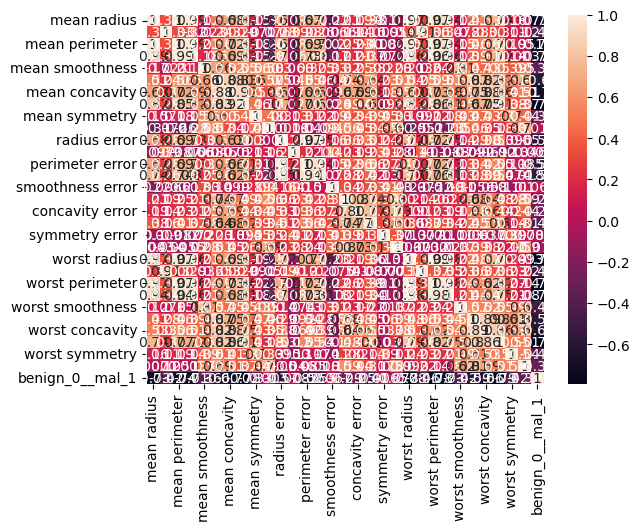

In [13]:
explorer.DisplayHeatMap()

................................................................................................................................................................................................................

### Testing the NeuralNetwork class

In [15]:
input_features = len(df.columns) - 1
out_features=df['benign_0__mal_1'].unique().sum()
neural_net = NeuralNetwork(input_features,out_features)
print("Neural Network Architecture:")
print(neural_net)

Neural Network Architecture:
NeuralNetwork(
  (fc1): Linear(in_features=30, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=15, bias=True)
  (fc3): Linear(in_features=15, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


### Testing the ModelTraining class

In [18]:
from torch import nn
model = neural_net
criterion = nn.BCELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [150]:

from modeltrainer import ModelTrainer
trainer = ModelTrainer(model, criterion, optimizer)
train_losses, test_losses = trainer.train(x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor, epochs=600)

Epoch [1/600], Training Loss: 0.6725, Validation Loss: 0.6749
Epoch [2/600], Training Loss: 0.6724, Validation Loss: 0.6748
Epoch [3/600], Training Loss: 0.6723, Validation Loss: 0.6747
Epoch [4/600], Training Loss: 0.6723, Validation Loss: 0.6746
Epoch [5/600], Training Loss: 0.6722, Validation Loss: 0.6746
Epoch [6/600], Training Loss: 0.6721, Validation Loss: 0.6745
Epoch [7/600], Training Loss: 0.6721, Validation Loss: 0.6744
Epoch [8/600], Training Loss: 0.6720, Validation Loss: 0.6743
Epoch [9/600], Training Loss: 0.6719, Validation Loss: 0.6743
Epoch [10/600], Training Loss: 0.6718, Validation Loss: 0.6742
Epoch [11/600], Training Loss: 0.6718, Validation Loss: 0.6741
Epoch [12/600], Training Loss: 0.6717, Validation Loss: 0.6741
Epoch [13/600], Training Loss: 0.6716, Validation Loss: 0.6740
Epoch [14/600], Training Loss: 0.6715, Validation Loss: 0.6739
Epoch [15/600], Training Loss: 0.6715, Validation Loss: 0.6738
Epoch [16/600], Training Loss: 0.6714, Validation Loss: 0.6738
E

In [115]:
'''epochs = 600
train_losses = []
test_losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = outputs.squeeze(0)
    outputs = model(x_train_tensor)
    outputs = outputs.squeeze(1)
    loss = criterion(outputs, y_train_tensor)
    #Effectue la rétropropagation pour calculer les gradients de la perte par rapport aux paramètres du modèle.
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.no_grad():
        test_outputs = model(x_test_tensor)
        test_outputs=test_outputs.squeeze(1)
        test_loss = criterion(test_outputs, y_test_tensor)
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

    print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {test_loss.item():.4f}')
'''

Epoch [1/600], Training Loss: 0.6804, Validation Loss: 0.6808
Epoch [2/600], Training Loss: 0.6802, Validation Loss: 0.6807
Epoch [3/600], Training Loss: 0.6801, Validation Loss: 0.6805
Epoch [4/600], Training Loss: 0.6799, Validation Loss: 0.6804
Epoch [5/600], Training Loss: 0.6798, Validation Loss: 0.6802
Epoch [6/600], Training Loss: 0.6796, Validation Loss: 0.6801
Epoch [7/600], Training Loss: 0.6795, Validation Loss: 0.6799
Epoch [8/600], Training Loss: 0.6793, Validation Loss: 0.6798
Epoch [9/600], Training Loss: 0.6792, Validation Loss: 0.6796
Epoch [10/600], Training Loss: 0.6790, Validation Loss: 0.6795
Epoch [11/600], Training Loss: 0.6789, Validation Loss: 0.6793
Epoch [12/600], Training Loss: 0.6787, Validation Loss: 0.6792
Epoch [13/600], Training Loss: 0.6786, Validation Loss: 0.6791
Epoch [14/600], Training Loss: 0.6784, Validation Loss: 0.6789
Epoch [15/600], Training Loss: 0.6783, Validation Loss: 0.6788
Epoch [16/600], Training Loss: 0.6781, Validation Loss: 0.6786
E

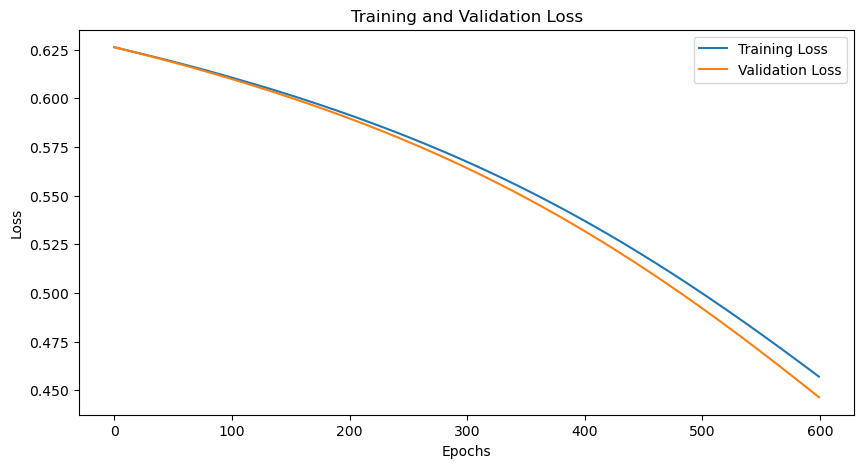

In [146]:
trainer.plot_loss(train_losses, test_losses)

In [140]:
evaluator = ModelEvaluation(model, criterion, optimizer)

In [141]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test_tensor)
    y_pred = (y_pred > 0.5).float()

Confusion Matrix

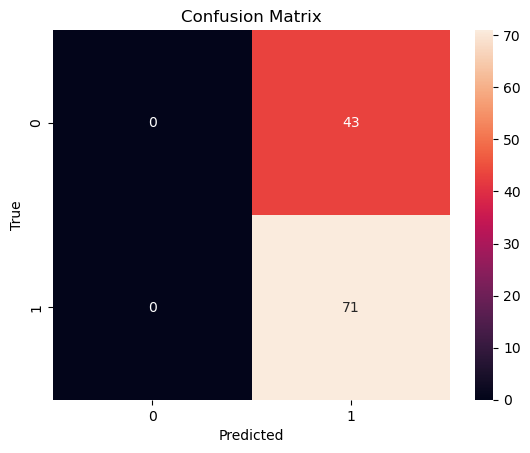

In [142]:
evaluator.confusion_matrix(y_test_tensor, y_pred)

Classification Report

In [128]:
evaluator.classification_report(y_test_tensor, y_pred)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        43
         1.0       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



c:\Users\HP\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy Score

In [129]:
evaluator.accuracy_score(y_test_tensor, y_pred)

Accuracy: 0.6228070175438597


0.6228070175438597

Prediction Visualization

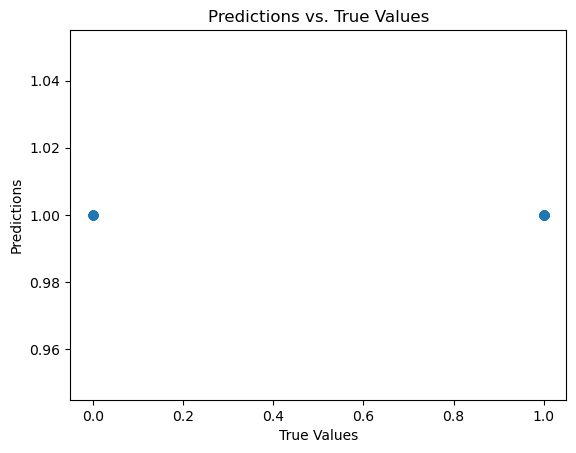

In [147]:
evaluator.plot_prediction(y_test_tensor, y_pred)

Prediction Error Distribution

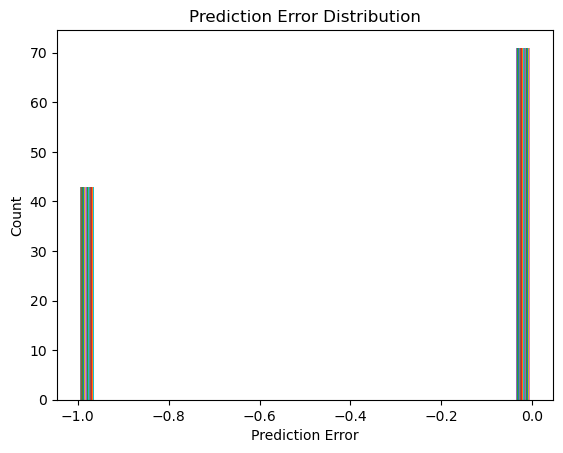

In [148]:
evaluator.plot_prediction_error(y_test_tensor, y_pred)